# Notebook Usage

<ul>
<li>Create an intact weekly level timeseries of the prices of products in /data exels
<li>This data will be visualized in the frontend react app
</ul>

#### Processing logic

1. Load all excels into a single dataframe
2. Create time periods (weeks, months) from start of data to end of data
3. For each product, (EAN-koodi) generate the time series
* Max price during time period
4. Make test visualization before frontend functionality

* Consider product grouping, could be useful e.g. if product has only slightly changed


In [46]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Load in the excels using pandas

file_location = "..\data"

raw_data = pd.DataFrame()

for file_name in os.listdir(file_location):
    if file_name[-4:] == 'xlsx':
        print(file_name)
        df_one_file = pd.read_excel(f"{file_location}\{file_name}", skiprows=8)
        df_one_file["source"] = file_name
        raw_data = pd.concat([raw_data, df_one_file])
    

ostotietoraportti_aluoto.xlsx
ostotietoraportti_jluoto.xlsx


In [48]:
raw_data['EAN-KOODI'] = raw_data['EAN-KOODI'].astype(str)

In [49]:
raw_data.head()

,PÄIVÄMÄÄRÄ,KELLONAIKA,TOIMIPAIKKA,TUOTERYHMÄ,TUOTENIMI,EAN-KOODI,Yksikköhinta € verollinen,Ostetut tuotteet (paino/kpl),Myyntihinta €,Alennukset €,OSTOT €,source
0,2021-06-30,15:08,PRISMA HYVINKÄÄ,Mehu- ja juoma-annospakkauks. lämpimästä,10 x Rainbow päärynäjuoma 2dl,6415712500894,2.15,1.0,2.15,0.0,2.15,ostotietoraportti_aluoto.xlsx
1,2021-06-30,15:08,PRISMA HYVINKÄÄ,Mehu- ja juoma-annospakkauks. lämpimästä,10 x Rainbow vadelma-mansikka juoma 2dl,6415712500887,2.15,1.0,2.15,0.0,2.15,ostotietoraportti_aluoto.xlsx
2,2020-01-24,18:12,PRISMA HYVINKÄÄ,Rakennussarjat,10918 Hinausauto LEGO,5702016618082,5.90,1.0,5.90,0.0,5.90,ostotietoraportti_aluoto.xlsx
3,2020-01-24,18:12,PRISMA HYVINKÄÄ,Rakennussarjat,10920 Elsan ja Olafin teekutsut LEGO,5702016618105,22.90,1.0,22.90,0.0,22.90,ostotietoraportti_aluoto.xlsx
4,2020-06-17,16:27,PRISMA MIKKELI,Rakennussarjat,11008 Palikat ja talot LEGO,5702016616590,22.90,1.0,22.90,0.0,22.90,ostotietoraportti_aluoto.xlsx


In [50]:
# Identify top products. Names for eancodes have along the way, dont want duplicates
top_products = raw_data\
    .groupby(by=['EAN-KOODI']) \
    .agg({'Myyntihinta €': 'sum', 'TUOTENIMI':'max', 'TUOTERYHMÄ':'max'}) \
    .rename(columns={'Myyntihinta €':'total€'})

top_products = top_products.sort_values(by='total€', ascending=False).reset_index().head(40)
top_eanCodes = top_products['EAN-KOODI'].values

top_products

,EAN-KOODI,total€,TUOTENIMI,TUOTERYHMÄ
0,6430015538009,3103.22,Fazer Aito 1l ESL Gluteeniton Kaurajuoma,Kasvipohjaiset juomat
1,6414893500167,1463.53,Kotimaista naudan jauheliha 17 % 700 g,Tuore valintaliha
2,6438348001566,1238.60,Kotimaista Kaurajuoma ESL 1l,Kasvipohjaiset juomat
3,6407810014397,1188.18,Atria Kanan Ohut Fileeleike Pehmeän Pippurinen...,Tuore valintaliha
4,7310100703347,1170.85,Semper Fruktmums Persikka 6kk hedelmäsose 110g,Lastenruoat
5,7310100703262,1141.66,Semper Fruktmums Vadelma 6kk hedelmäsose 110g,Lastenruoat
6,6408430039432,1074.79,Valio Oltermanni® e1 kg,Perusjuustopalat
7,6413605015210,941.36,"4 x Pepsi Max virvoitusjuoma 2,0 l",Virvoitusjuomat
8,2000503600002,739.38,Chiquita-banaani,Hedelmät
9,7322541090580,726.27,"Libero Up&Go housuvaippa koko 6, 13-20 kg, 56 kpl",Vauvanvaipat


In [51]:
# Product dimension
D_Product = top_products[['TUOTENIMI', 'TUOTERYHMÄ', 'EAN-KOODI']].reset_index(drop=True)
D_Product = D_Product.rename(columns={'TUOTERYHMÄ':'productGroup', 'TUOTENIMI':'productName', 'EAN-KOODI':'eanCode'})
D_Product

,productName,productGroup,eanCode
0,Fazer Aito 1l ESL Gluteeniton Kaurajuoma,Kasvipohjaiset juomat,6430015538009
1,Kotimaista naudan jauheliha 17 % 700 g,Tuore valintaliha,6414893500167
2,Kotimaista Kaurajuoma ESL 1l,Kasvipohjaiset juomat,6438348001566
3,Atria Kanan Ohut Fileeleike Pehmeän Pippurinen...,Tuore valintaliha,6407810014397
4,Semper Fruktmums Persikka 6kk hedelmäsose 110g,Lastenruoat,7310100703347
5,Semper Fruktmums Vadelma 6kk hedelmäsose 110g,Lastenruoat,7310100703262
6,Valio Oltermanni® e1 kg,Perusjuustopalat,6408430039432
7,"4 x Pepsi Max virvoitusjuoma 2,0 l",Virvoitusjuomat,6413605015210
8,Chiquita-banaani,Hedelmät,2000503600002
9,"Libero Up&Go housuvaippa koko 6, 13-20 kg, 56 kpl",Vauvanvaipat,7322541090580


In [52]:
# Create the timestamps as the baseline for price time series

mindate = raw_data['PÄIVÄMÄÄRÄ'].min()
maxdate = raw_data['PÄIVÄMÄÄRÄ'].max()

date_range = pd.date_range(start=mindate, end=maxdate)

date_range = pd.DataFrame(date_range)
date_range = date_range.rename(columns={0:'date'})

In [53]:
def price_history_for_product(ean_code:int, product_transactions:pd.DataFrame, dates_df:pd.DataFrame) -> pd.DataFrame:
    """
    Fills the gaps in the transactions dataframe
    """
    # Get max price for each day (if multiple rows for one day)
    product_daily_prices = product_transactions.groupby('PÄIVÄMÄÄRÄ').agg({'Yksikköhinta € verollinen': 'max'})
    product_daily_prices['eanCode'] = ean_code

    # left join product daily price with the date range
    product_daily_prices_full = pd.merge(left=dates_df, right=product_daily_prices, left_on='date', right_on='PÄIVÄMÄÄRÄ', how='left')

    product_daily_prices_full_final = product_daily_prices_full.sort_values(by='date').ffill()
    product_daily_prices_full_final = product_daily_prices_full.bfill() # Fill the first blank dates of the time series

    return product_daily_prices_full_final


In [54]:
# Get max price for each day for a product
price_history_all_products = None
ean_codes = top_eanCodes

for ean_code in ean_codes:
    # Filter with current product
    product_transactions = raw_data[raw_data['EAN-KOODI'] == ean_code]
    # Get price history for current product
    one_product_history = price_history_for_product(ean_code, product_transactions, date_range)
    
    # Append data into the price_history_all_products Spark DataFrame
    if price_history_all_products is None:
        price_history_all_products = one_product_history
    else:
        price_history_all_products = pd.concat([price_history_all_products, one_product_history])

# add Tuoteryhmä and TuoteNimi
price_history_all_products = price_history_all_products.merge(D_Product, on='eanCode', how='left')
price_history_all_products = price_history_all_products.rename(columns={'Yksikköhinta € verollinen': 'unitPrice'})
price_history_all_products = price_history_all_products.dropna(subset=['eanCode'])
price_history_all_products.sample(10)

,date,unitPrice,eanCode,productName,productGroup
20169,2020-05-04,5.49,6414893501003,Kotimaista Kanan fileesuikale miedosti suolatt...,Tuore valintaliha
1964,2024-05-18,1.79,6430015538009,Fazer Aito 1l ESL Gluteeniton Kaurajuoma,Kasvipohjaiset juomat
31460,2024-04-24,2.09,6409100060916,HK Popsi® Grillinakki 300 g,Tuoreet lihavalmisteet valinta
35483,2019-03-01,1.99,6410380097752,Oolannin muusiperuna 400g,Perunapakasteet
57143,2019-03-13,1.82,6413600015161,"2 x Pepsi Max virvoitusjuoma 1,5 l",Virvoitusjuomat
10906,2021-12-02,0.99,7310100703262,Semper Fruktmums Vadelma 6kk hedelmäsose 110g,Lastenruoat
37114,2023-08-18,2.70,6410380097752,Oolannin muusiperuna 400g,Perunapakasteet
66408,2023-01-04,1.39,6430015538108,"Fazer Aito Vispi 2,5 dl, gluteeniton vispautuv...",Ruoanv ja leivontatuotteet maitotal
34035,2020-08-02,7.79,6407830037277,Atria Kanan Ohut Fileeleike Mustapippuri 500g,Tuore valintaliha
70155,2022-06-29,2.39,6438207011620,Keiju Laktoositon kasvirasvalevite 70 % 600 g,Rasiamargariinit


In [55]:
# Calculate aggregates for each product
# firstPrice, lastPrice, maxPrice, minPrice, priceChange

# Filter raw_data to have top_eanCodes

raw_data_filtered = raw_data[raw_data['EAN-KOODI'].isin(ean_codes)].reset_index(drop=True)
product_aggregates = raw_data_filtered.groupby(by='EAN-KOODI').agg(
        min_price=('Yksikköhinta € verollinen','min'),
        max_price=('Yksikköhinta € verollinen', 'max'))

first_price_indexes = raw_data_filtered.groupby('EAN-KOODI')['PÄIVÄMÄÄRÄ'].idxmin()
first_prices = raw_data_filtered.loc[first_price_indexes][['Yksikköhinta € verollinen', 'EAN-KOODI']]
first_prices = first_prices.rename(columns={'Yksikköhinta € verollinen': 'first_price'})

last_price_indexes = raw_data_filtered.groupby('EAN-KOODI')['PÄIVÄMÄÄRÄ'].idxmax()
last_prices = raw_data_filtered.loc[last_price_indexes][['Yksikköhinta € verollinen', 'EAN-KOODI']]
last_prices = last_prices.rename(columns={'Yksikköhinta € verollinen': 'last_price'})

product_aggregates = pd.merge(left=product_aggregates, right=first_prices, on='EAN-KOODI', how='left')
product_aggregates = pd.merge(left=product_aggregates, right=last_prices, on='EAN-KOODI', how='left')

product_aggregates['price_change_percentage'] = (product_aggregates['last_price'] / product_aggregates['first_price']) * 100 - 100

product_aggregates['price_change_€'] = product_aggregates['last_price'] - product_aggregates['first_price']

product_aggregates = product_aggregates.rename(columns={'EAN-KOODI': 'eanCode'})
product_aggregates = pd.merge(left=product_aggregates, right=D_Product, on='eanCode', how='left')
product_aggregates.head(40)
# Calculate each aggregate kpi

,eanCode,min_price,max_price,first_price,last_price,price_change_percentage,price_change_€,productName,productGroup
0,2000503600002,0.89,1.89,1.29,1.88,45.736434,0.59,Chiquita-banaani,Hedelmät
1,2000522100002,1.69,3.99,1.88,2.99,59.042553,1.11,Päärynä Conference I Hollanti,Hedelmät
2,2000604700007,0.69,5.19,2.49,2.48,-0.401606,-0.01,Kurkku Suomi,Vihannekset
3,2000631800008,2.50,8.99,3.98,4.29,7.788945,0.31,Paprika punainen,Vihannekset
4,200074546781,5.90,5.90,5.90,5.90,0.000000,0.00,"KERÄILYMAKSU 5,90E",Muut Oheispalvelut Ja -Myynti
5,200088052865,0.40,0.40,0.40,0.40,0.000000,0.00,"PANTTI KMP 1L TAI YLI, K",Pantit
6,2393064000009,8.94,19.90,13.90,19.89,43.093525,5.99,Rainbow lohifilee 800-1400g vac n10kg,Tuore kala valinta
7,6406300009608,2.49,3.09,2.79,3.09,10.752688,0.30,Kivikylän Palvarin Lihapyörykkä 350g,Valmisruoka valinta
8,6407810014397,6.45,8.49,6.75,8.49,25.777778,1.74,Atria Kanan Ohut Fileeleike Pehmeän Pippurinen...,Tuore valintaliha
9,6407830037277,7.79,8.49,7.79,8.49,8.985879,0.70,Atria Kanan Ohut Fileeleike Mustapippuri 500g,Tuore valintaliha


C:\Users\Antti Luoto\AppData\Local\Temp\ipykernel_2736\3600182998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_history_all_products['date'] = pd.to_datetime(price_history_all_products['date'])


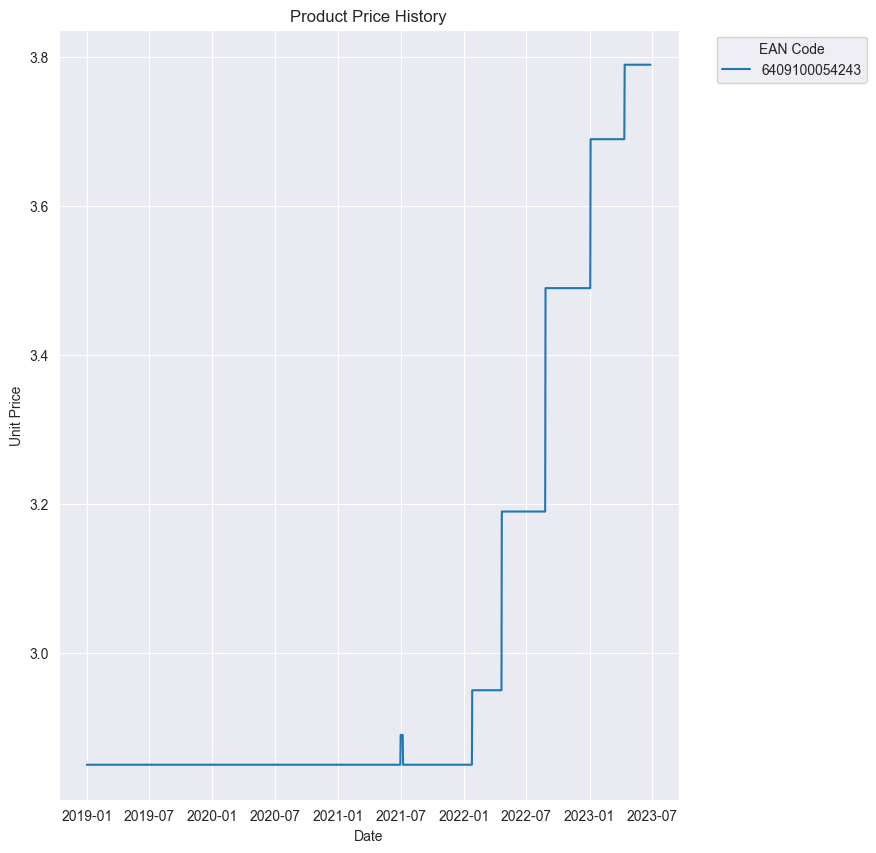

In [60]:
import seaborn as sns
def plot_product_prices(price_history_all_products:pd.DataFrame) ->None:
    # Set the figure size for better readability
    plt.figure(figsize=(8, 10))

    # Ensure 'date' is in the datetime format
    price_history_all_products['date'] = pd.to_datetime(price_history_all_products['date'])

    # Create a line plot with Seaborn, where each line represents a unique 'eanCode'
    sns.lineplot(data=price_history_all_products, x='date', y='unitPrice', hue='eanCode', markers=True)

    # Enhance the plot with a title and labels
    plt.title('Product Price History')
    plt.xlabel('Date')
    plt.ylabel('Unit Price')
    plt.legend(title='EAN Code', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

    # Show the plot
    plt.show()

# plot_product_prices(price_history_all_products[price_history_all_products['eanCode'] == '6414893500167'])
plot_product_prices(price_history_all_products[price_history_all_products['productName'] == 'Kevyt linja meetvursti 100 g'])

In [57]:
price_history_all_products['date'] = price_history_all_products['date'].astype(str)

In [58]:
# Save the list of dictionaries to a JSON file
with open('../front/public/data/F_PriceHistory.json', 'w') as file:
    json.dump(price_history_all_products.to_dict(orient='records'), file, indent=4)
    
with open('../front/public/data/F_ProductAggregates.json', 'w') as file:
    json.dump(product_aggregates.to_dict(orient='records'), file, indent=4)
    
# Save product dimension to json file
with open('../front/public/data/D_Product.json', 'w') as file:
    json.dump(D_Product.to_dict(orient='records'), file, indent=4)
    

In [59]:
price_history_all_products[price_history_all_products['productName'] == 'Kotimaista naudan jauheliha 17 % 700 g']['eanCode'].unique()

array(['6414893500167'], dtype=object)